### Simple Linear Regression

Hypothesis - $h_\Theta(x) = \Theta^Tx$

Cost Function - $J(\Theta) = \frac{1}{2m} \sum_{i=1}^m (h_\Theta(x^{(i)}) - y^{(i)} )^2$ - Mean Squared Error Cost Function

Optimization Algorithm - $\Theta_j := \Theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ - Batch Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("Univariate.csv", header=None)

In [3]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
df.columns = ["Population of City", "Profit"]

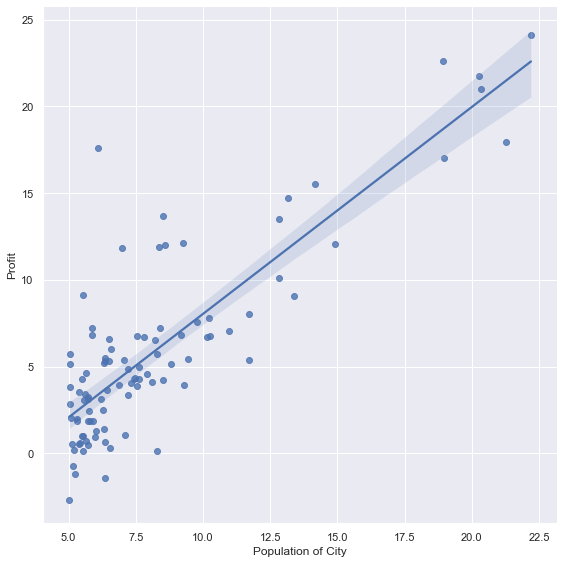

In [6]:
sns.lmplot(data=df, x="Population of City", y="Profit", height=8)

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    y_hat = np.dot(X, theta)
    squared_error = (y_hat - y)**2
    cost = 1 / (2 * m) * np.sum(squared_error)
    return cost

In [8]:
m = df.values[:, 0].size
X = np.append(np.ones((m, 1)), df.values[:, 0].reshape((m, 1)), axis=1)
y = df.values[:, 1].reshape((m, 1))
theta = np.zeros((2, 1))

### Gradient Descent

In [9]:
def gradientDescent(X, y, theta, learningRate, numberOfIterations):
    # X - (97, 2), y - (97, 1), theta - (2, 1), y_hat - (97, 1), squared_error - (97, 1), steepest_ascent - (2, 1) 
    m=len(y) 
    cost_history=[]
    for i in range(numberOfIterations):
        y_hat = np.dot(X, theta)
        squared_error = (y_hat - y)
        steepest_ascent = np.dot(X.T, squared_error) * 1/m
        theta -= steepest_ascent  * learningRate
        cost_history.append(computeCost(X, y, theta))
    return theta, cost_history

In [10]:
theta, cost_history = gradientDescent(X, y, theta, 0.01, 1500)
print(f"h(x) = {round(theta[0,0],2)} + {round(theta[1,0],2)}x")

h(x) = -3.63 + 1.17x


Text(0.5, 1.0, 'Cost function using Gradient Descent')

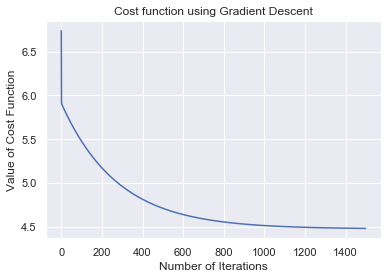

In [11]:
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Value of Cost Function")
plt.title("Cost function using Gradient Descent")

In [12]:
def predict(x):
    y_pred = np.dot(theta.T, x)
    return y_pred[0]

In [13]:
x_test = np.array([1, 4])
y_pred = predict(x_test)
print(f"A profit is {round(y_pred * 10000,2)} for a population of {x_test[1] * 10000}")

A profit is 10351.58 for a population of 40000


In [14]:
x_test = np.array([1, 3.5])
y_pred = predict(x_test)
print(f"A profit is {round(y_pred * 10000, 2)} for a population of {x_test[1] * 10000}")

A profit is 4519.77 for a population of 35000.0
